# 2.1 Images - Yazan Alatoom (ME 592)

In [3]:
# Install torchvision, torch, and einops
!pip install torchvision
!pip install torch
!pip install einops

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [4]:
# Task 1: Download MNIST dataset and create a subset
import torch
from torchvision import datasets, transforms
from torch.utils.data import Subset

# Define the transformation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download the MNIST training dataset
mnist_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)

# Create a subset with 1,000 samples
subset_indices = torch.randperm(len(mnist_dataset))[:1000]
mnist_subset = Subset(mnist_dataset, subset_indices)


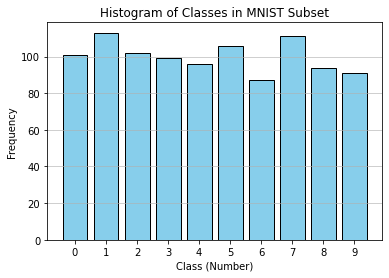

In [5]:
# Task 2: Plot a histogram of classes in the subset
import matplotlib.pyplot as plt

# Get the labels from the subset
subset_labels = [mnist_subset[i][1] for i in range(len(mnist_subset))]

# Plot the histogram
plt.hist(subset_labels, bins=range(11), align='left', rwidth=0.8, color='skyblue', edgecolor='black')
plt.title('Histogram of Classes in MNIST Subset')
plt.xlabel('Class (Number)')
plt.ylabel('Frequency')
plt.xticks(range(10))
plt.grid(axis='y', alpha=0.75)
plt.show()

In [14]:
# Task 3: Use einops to 'batch' the subset
from einops import rearrange

# Convert the subset data to the required format
batch_size = 25
batches = rearrange(mnist_subset.dataset.data[subset_indices], 'b h w -> (b) 1 h w', b=1000)

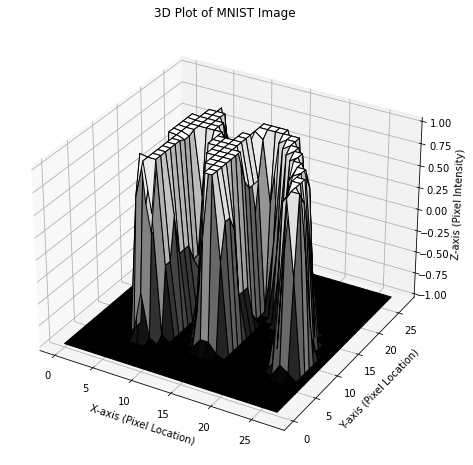

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Randomly select an MNIST image sample
sample_index = torch.randint(len(mnist_subset), size=(1,)).item()
sample_image = mnist_subset[sample_index][0][0]  # Extracting the 2D image tensor

# Create 3D plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Get pixel intensities
x, y = torch.meshgrid(torch.arange(28), torch.arange(28))
z = sample_image.numpy()

# Plot the 3D image
ax.plot_surface(x, y, z, cmap='gray', edgecolor='k')
ax.set_xlabel('X-axis (Pixel Location)')
ax.set_ylabel('Y-axis (Pixel Location)')
ax.set_zlabel('Z-axis (Pixel Intensity)')
ax.set_title('3D Plot of MNIST Image')

plt.show()